<a href="https://colab.research.google.com/github/jparkgit/ESAA-23-2/blob/main/Week3_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[과제함 - 네이버 카페](https://cafe.naver.com/esaa2019?iframe_url_utf8=%2FArticleRead.nhn%253Fclubid%3D29858915%2526page%3D1%2526menuid%3D80%2526boardtype%3DL%2526articleid%3D2350%2526referrerAllArticles%3Dfalse)\
기한: 9월 22일 (금) 18시 30분\
과제: 파이썬 머신러닝 완벽가이드 ch2.1-4: pg. 87-117 필사하여 깃허브에 업로드하고, 깃허브 링크를 댓글로 달아주세요.

# 02 scikit-learn 으로 시작하는 머신러닝

## 2.1 scikit-learn 소개와 특징

In [ ]:
import pandas as pd
import sklearn
print(sklearn.__version__)

1.2.2


## 2.2 iris 예측

* Classification: 대표적인 supervised learning 방법 중 하나
* Supervised learning: 정답이 주어진 데이터를 학습한 뒤 미지의 정답을 예측
* hyper paramter: ML 알고리즘별로 최적의 학습을 위해 직접 입력하는 parameters, 이들로 알고리즘 성능을 튜닝
* 이번에 사용할 ML 알고리즘: decision tree: DecisionTreeClassifier

---

* sklearn.datasets
* sklearn.tree : 트리 기반 ML 알고리즘 클래스 모임 (ex. DecisionTreeClassifier)
* sklearn.model_selection (ex. train_test_split)


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
iris = load_iris()
iris_data = iris.data # iris dataset에서 feature 만으로 된 데이터
iris_label = iris.target # iris dataset에서 label 데이터

# iris target 이름
print(iris.target_names)
# iris target 값
print(iris_label)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# DataFrame 으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Label
* 0 = setosa
* 1 = versicolor
* 2 = virginica


---

Train & Test split
```
train_test_split(feature_dataset, label_dataset, test_size, random_state = seed)
```

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                    test_size = 0.2,
                                                    random_state = 11)

X = feature dataset (train & test)\
y = label dataset (train & test)

In [ ]:
# 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
# train data로 학습 수행
dt_clf.fit(X_train, y_train)
# 학습 완료된 객체에서 test data로 예측 수행
pred = dt_clf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.9555555555555556


## 2.3 scikit-learn 의 기본 프레임워크 익히기

### 2.3.1 Estimator 이해, fit(), predict()
* Estimator: classifier & regressor (supervised learning의 모든 알고리즘을 구현한 클래스를 통칭)
* cross_val_score() 같은 evaluation 함수와 GridSearchCV 와 같은 hyper parameter tuning을 지원하는 클래스는 estimator을 인자로 받아 estimator의 fit(), predict()를 호출해서 분류 또는 회귀 구현을 함


### 2.3.2 scikit-learn 의 주요 모듈
* 예제 데이터
  * sklearn.datasets
* feature 처리
  * sklearn.preprocessing
  * sklearn.feature_selection
  * sklearn.feature_extraction
* feature 처리 & 차원 축소
  * sklearn.decomposition
* 데이터 분리, 검증, parameter tuning
  * sklearn.model_selection
* 평가
  * sklearn.metrics
* ML 알고리즘
  * sklearn.ensemble
  * sklearn.linear_model
  * sklearn.naive_bayes
  * sklearn.neighbors
  * sklearn.svm
  * sklearn.tree
  * sklearn.cluster
* 유틸리티
  * sklearn.pipeline

### 2.3.3 내장된 예제 dataset

API
* `datasets.make_classifications()`
* `datasets.make_blobs()`


---

`load_iris()` API의 반환 결과: sklearn.utils.Bunch 클래스\
Bunch 클래스: 파이썬 딕셔너리 자료형과 유사
* 데이터 키: 피러들의 데이터 값을 가리킴
* 피처 데이터 값 추출: `dataset.data`



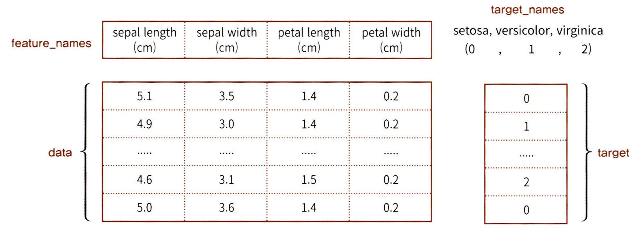

In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()
type(iris_data)

sklearn.utils._bunch.Bunch

In [ ]:
keys = iris_data.keys()
print(keys)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
# feature_names
print(type(iris_data.feature_names))
print(iris_data.feature_names)

<class 'list'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# target_names
print(type(iris_data.target_names))
print(iris_data.target_names)

<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']


In [ ]:
# target
print(type(iris_data.target))
print(iris_data.target)

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 2.4 Model Selection 모듈 소개

### 2.4.1 train_test_split()

Test 데이터 세트 이용 없이 train 데이터로만 학습하고 예측하면 생기는 문제\
Accuracy score = 100%

In [21]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris=load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# train data로 예측 수행
pred = dt_clf.predict(train_data)
print(accuracy_score(train_label, pred))

1.0


train 70 : test 30

In [23]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

# train test split
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size = 0.3, random_state = 121)

# train 데이터로 학습 .fit
dt_clf.fit(X_train, y_train)

# test 데이터로 예측 .predict
pred = dt_clf.predict(X_test)

# accuracy score
print(accuracy_score(y_test, pred))

0.9555555555555556


### 2.4.2 Cross Valiation
* Overfitting 방지/해결
  * 모델이 train data에만 과도하게 최적화되어 다른 데이터로 실제로 예측할 때 예측 성능이 과도하게 떨어지는 현상
* CV: 데이터의 편중을 막기 위해 여러 세트로 구성된 train & test dataset 이용


---
1. K-fold CV
2. Stratified K-fold CV


In [24]:
import numpy as np

dt_clf = DecisionTreeClassifier(random_state=156)

#### ***** K-fold

In [32]:
features = iris.data
features.shape[0] # 150 data
iris_label = iris.target

In [27]:
from sklearn.model_selection import KFold

# 5개의 fold set로 분리하는 객체
kfold = KFold(n_splits=5)

# fold set 별 accuracy score 담을 리스트
cv_accuracy = []

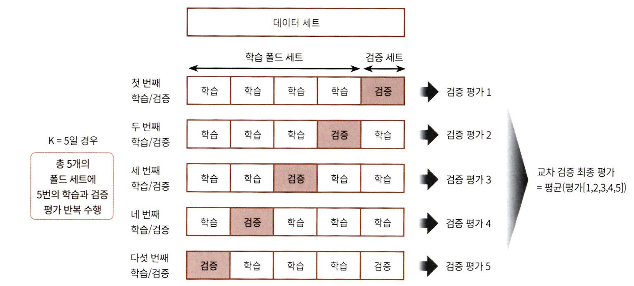

In [36]:
# 150개의 data를 5 fold로 분할
# train: 150*(4/5) = 120
# test: 150*(1/5) = 30

n_iter = 0


for train_index, test_index in kfold.split(features):
  # test, train data 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = iris_label[train_index], iris_label[test_index]
  # train(fit) & pred
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter +=1
  # accuracy 측정 & list에 추가
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  cv_accuracy.append(accuracy)
  # 결과 표시
  print('\n')
  print('#{0}    CV accuracy: {1}, train size: {2}, test size: {3}'
  .format(n_iter,    accuracy,     train_size,     test_size))
  print('#{0}    test set index:{1}'
  .format(n_iter,   test_index))



# iteration들의 평균 accuracy
print('\n')
print('#### mean accuracy:', np.mean(cv_accuracy))



#1    CV accuracy: 1.0, train size: 120, test size: 30
#1    test set index:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


#2    CV accuracy: 0.9667, train size: 120, test size: 30
#2    test set index:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]


#3    CV accuracy: 0.8667, train size: 120, test size: 30
#3    test set index:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]


#4    CV accuracy: 0.9333, train size: 120, test size: 30
#4    test set index:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]


#5    CV accuracy: 0.7333, train size: 120, test size: 30
#5    test set index:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]


#### mean accuracy: 0.9


#### ***** Stratified K-Fold CV
for label datasets with imbalanced distribution (particular label is especially abundant or scarce)\
* 원본 data의 label 분포를 먼저 고려한 뒤
* 이 분포와 동일하게 train & test 데이터 세트를 분배

In [37]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

### 2.4.3 GridSearchCV - CV + optimal hyper parameter tuning